#### Copyright © 2021 United States Government as represented by the Administrator of the National Aeronautics and Space Administration.  All Rights Reserved.

##### Example demonstrating approaches for adding and handling model noise

In [52]:
# DGFASDGSDAEGASERHASEHASDGASDFGSSSSS

In [41]:
import matplotlib.pyplot as plt
from prog_models.models.thrown_object import ThrownObject, LinearModel

#### Defining ThrownObject
##### For our first example we define ThrownObject to have no process noise, hence why process_noise = False

In [42]:
m = ThrownObject(process_noise=False)

### Define future loading, configuration for simulation, and a function to print the results

In [43]:
def future_load(t=None, x=None):  
    # The thrown object model has no inputs- you cannot load the system (i.e., affect it once it's in the air)
    # So we return an empty input container
    return m.InputContainer({})


# Define configuration for simulation
config = {
    'threshold_keys': 'impact', # Simulate until the thrown object has impacted the ground
    'dt': 0.005, # Time step (s)
    'save_freq': 0.5, # Frequency at which results are saved (s)
}

# Define a function to print the results - will be used later
def print_results(simulated_results):
    # Print results
    print('states:')
    for (t,x) in zip(simulated_results.times, simulated_results.states):
        print('\t{:.2f}s: {}'.format(t, x))

    print('outputs:')
    for (t,x) in zip(simulated_results.times, simulated_results.outputs):
        print('\t{:.2f}s: {}'.format(t, x))

    print('\nimpact time: {:.2f}s'.format(simulated_results.times[-1]))
    # The simulation stopped at impact, so the last element of times is the impact time

    # Plot results
    simulated_results.states.plot()

### Ex1: No noise

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 20.35092591060207, 'v': 34.07855124289541}
	1.00s: {'x': 36.12822744263126, 'v': 28.393737692901528}
	1.50s: {'x': 48.9812214219364, 'v': 22.99846684410669}
	2.00s: {'x': 59.18332628263409, 'v': 17.784029484245163}
	2.50s: {'x': 66.81357749367159, 'v': 12.705288070826589}
	3.00s: {'x': 71.92955924357045, 'v': 7.721366562656726}
	3.50s: {'x': 74.56918342157253, 'v': 2.794268972436784}
	4.00s: {'x': 74.75187498447991, 'v': -2.1113986020335997}
	4.50s: {'x': 72.51970359869338, 'v': -6.951038077083324}
	5.00s: {'x': 67.84376796132159, 'v': -11.78994457815374}
	5.50s: {'x': 60.767651534582804, 'v': -16.545494944171786}
	6.00s: {'x': 51.34088892233225, 'v': -21.18640641142484}
	6.50s: {'x': 39.62791879000095, 'v': -25.684491985662305}
	7.00s: {'x': 25.706379318441126, 'v': -30.015262094408577}
	7.50s: {'x': 9.665150243939953, 'v': -34.158332454780265}
	7.78s: {'x': -0.02584293949765626, 'v': -36.35101411864478}
outputs:
	0.00s: {'x': 1.83}

Text(0.5, 1.0, 'Ex1: No noise')

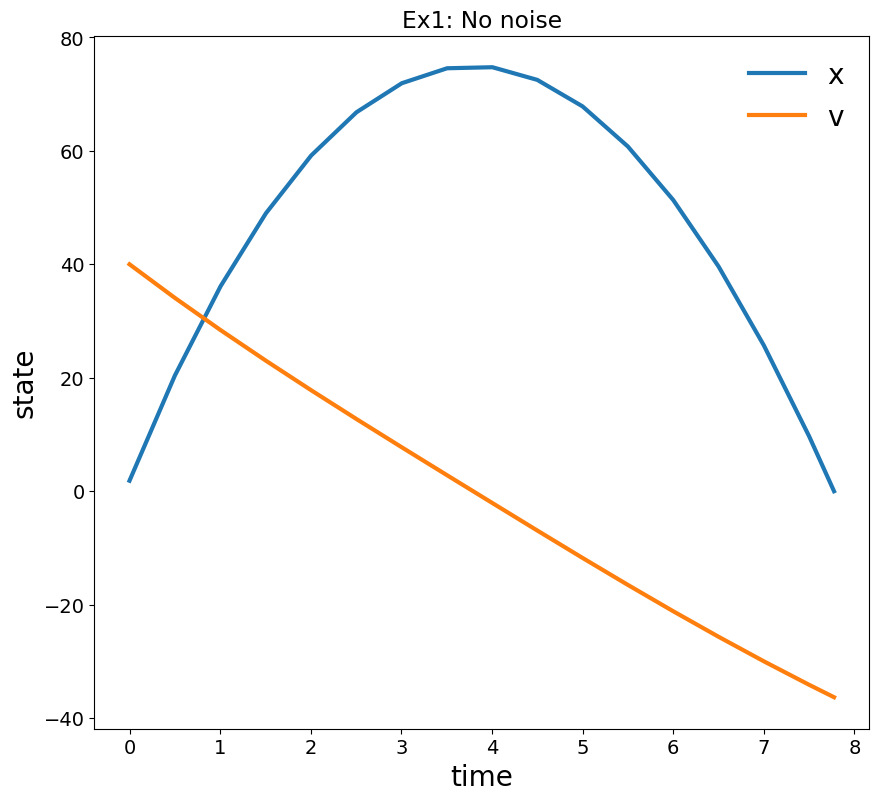

In [44]:
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex1: No noise')

### Ex2: with noise - same noise applied to every state

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 20.349005668000675, 'v': 35.05449923423843}
	1.00s: {'x': 37.27227484398734, 'v': 29.92891535615346}
	1.50s: {'x': 50.74410713800665, 'v': 25.43244199959323}
	2.00s: {'x': 62.558530723506074, 'v': 20.34230426019961}
	2.50s: {'x': 71.33323853864266, 'v': 15.182083437867076}
	3.00s: {'x': 77.2464554477743, 'v': 9.775182775510546}
	3.50s: {'x': 81.26566806761535, 'v': 5.248434966922843}
	4.00s: {'x': 81.26414155259101, 'v': 0.049694544899325246}
	4.50s: {'x': 80.20826770262062, 'v': -3.7590447824225275}
	5.00s: {'x': 76.77328554142511, 'v': -8.234531902039619}
	5.50s: {'x': 70.98115100308242, 'v': -14.004946563633206}
	6.00s: {'x': 62.85153160055016, 'v': -18.911096494724887}
	6.50s: {'x': 51.71931273316645, 'v': -24.164129801030413}
	7.00s: {'x': 39.091610945158536, 'v': -29.283641055447927}
	7.50s: {'x': 23.881887825137593, 'v': -33.2334519435878}
	8.00s: {'x': 6.960773998060985, 'v': -36.46034004124959}
	8.20s: {'x': -0.0754176418154

Text(0.5, 1.0, 'Ex2: Basic Noise')

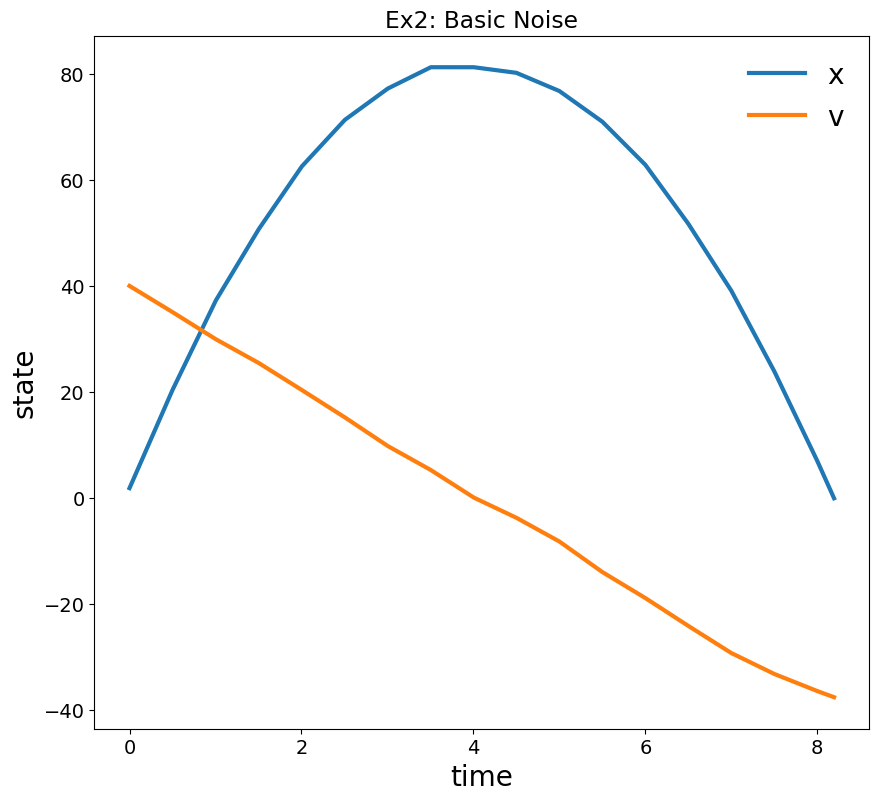

In [45]:
process_noise = 15
m = ThrownObject(process_noise=process_noise)
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex2: Basic Noise')

### Ex3: noise - more noise on position than velocity

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 20.659625002069923, 'v': 34.03121109998618}
	1.00s: {'x': 38.98231768307009, 'v': 28.334946594487445}
	1.50s: {'x': 52.653020965117676, 'v': 22.93337614641584}
	2.00s: {'x': 61.969220722652175, 'v': 17.709329484338976}
	2.50s: {'x': 66.68392727044923, 'v': 12.579919932903632}
	3.00s: {'x': 70.18749793144852, 'v': 7.778468569610442}
	3.50s: {'x': 74.52792547774197, 'v': 2.871877601587983}
	4.00s: {'x': 75.61600584052889, 'v': -1.984683345958304}
	4.50s: {'x': 70.66957394243542, 'v': -6.900875203876077}
	5.00s: {'x': 65.240751776361, 'v': -11.732582437146164}
	5.50s: {'x': 58.11199823928513, 'v': -16.542933736755828}
	6.00s: {'x': 48.644357110241934, 'v': -21.165956654475544}
	6.50s: {'x': 37.380794560708374, 'v': -25.656649042346977}
	7.00s: {'x': 24.167841389100136, 'v': -29.98479654298029}
	7.50s: {'x': 7.3642704839813575, 'v': -34.15367662601456}
	7.72s: {'x': -0.08484954926315152, 'v': -35.906569961425596}
outputs:
	0.00s: {'x': 1

Text(0.5, 1.0, 'Ex3: More noise on position')

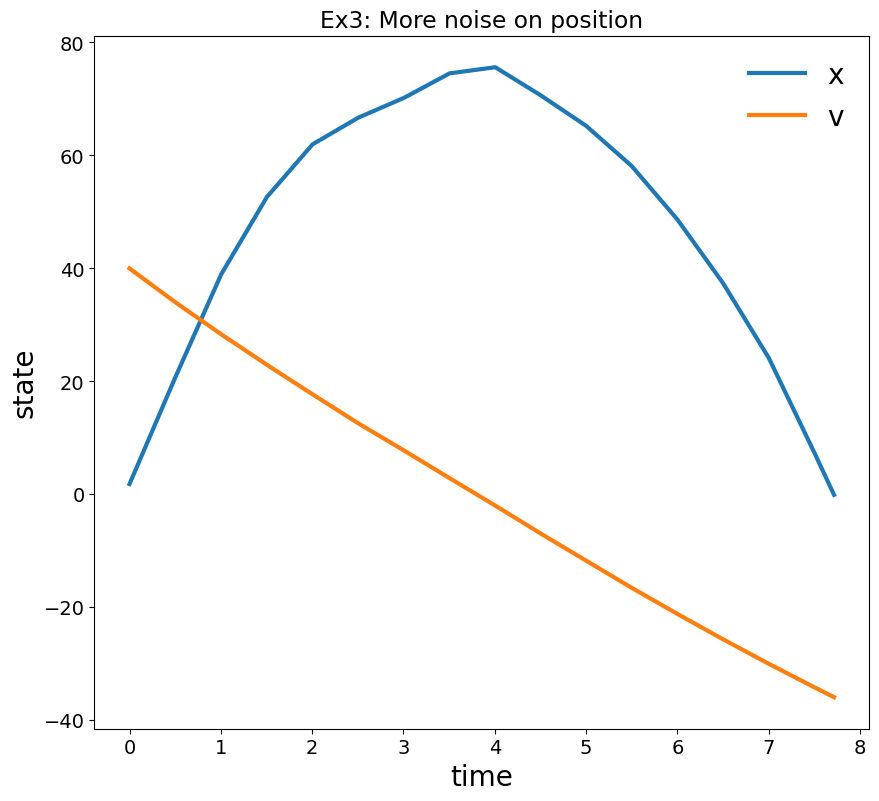

In [46]:
process_noise = {'x': 30, 'v': 1}
m = ThrownObject(process_noise=process_noise)
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex3: More noise on position')

### Ex4: noise - Ex3 but uniform

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 19.961003711526793, 'v': 34.083645566615964}
	1.00s: {'x': 36.86775320946655, 'v': 28.376016960872434}
	1.50s: {'x': 48.94831111892978, 'v': 22.931453865131683}
	2.00s: {'x': 59.25930574147596, 'v': 17.75506203392026}
	2.50s: {'x': 67.7247626623376, 'v': 12.688716167740733}
	3.00s: {'x': 73.05963782818098, 'v': 7.703575649255104}
	3.50s: {'x': 77.31103668838502, 'v': 2.855778588034055}
	4.00s: {'x': 79.20557571909814, 'v': -2.057012599433623}
	4.50s: {'x': 78.8307708885452, 'v': -6.930732002636105}
	5.00s: {'x': 74.97666830726567, 'v': -11.791705031321742}
	5.50s: {'x': 67.17676301374028, 'v': -16.540058648698963}
	6.00s: {'x': 57.48434174666512, 'v': -21.167404205250875}
	6.50s: {'x': 45.0096532774003, 'v': -25.71635231297025}
	7.00s: {'x': 30.523823280672143, 'v': -29.994190998948817}
	7.50s: {'x': 14.768526926113992, 'v': -34.11079833410803}
	7.94s: {'x': -0.2828404334756686, 'v': -37.518671332941466}
outputs:
	0.00s: {'x': 1.83}


Text(0.5, 1.0, 'Ex4: Ex3 with uniform dist')

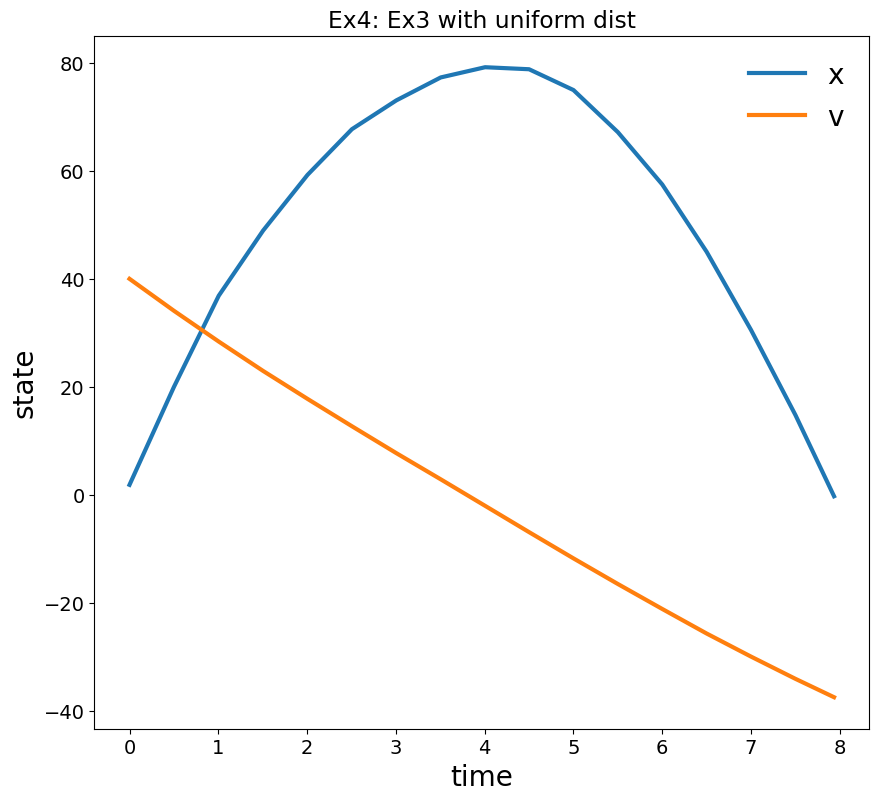

In [47]:
process_noise_dist = 'uniform'
model_config = {'process_noise_dist': process_noise_dist, 'process_noise': process_noise}
m = ThrownObject(**model_config)
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex4: Ex3 with uniform dist')

### Ex5: noise - Ex3 but triangle

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 21.725698772767952, 'v': 34.0706736197047}
	1.00s: {'x': 38.30288540849676, 'v': 28.40211442761662}
	1.50s: {'x': 51.94476032363368, 'v': 22.99925680898354}
	2.00s: {'x': 61.668343403150395, 'v': 17.768860867331654}
	2.50s: {'x': 68.84690689467061, 'v': 12.69985110960998}
	3.00s: {'x': 72.5782534104107, 'v': 7.740975487002594}
	3.50s: {'x': 74.84129208920496, 'v': 2.806586066329329}
	4.00s: {'x': 75.87762727800667, 'v': -2.1015469664176356}
	4.50s: {'x': 74.1604950441188, 'v': -6.9392077039748745}
	5.00s: {'x': 68.92229286497637, 'v': -11.763592361199237}
	5.50s: {'x': 62.596461718837915, 'v': -16.520998513241544}
	6.00s: {'x': 54.1180157053626, 'v': -21.17796659880177}
	6.50s: {'x': 42.934258005220705, 'v': -25.62910258348817}
	7.00s: {'x': 28.433324222768334, 'v': -29.953558514156697}
	7.50s: {'x': 13.047274080248856, 'v': -34.11894604987414}
	7.89s: {'x': -0.0008764034917991669, 'v': -37.233130205130095}
outputs:
	0.00s: {'x': 1.8

Text(0.5, 1.0, 'Ex5: Ex3 with triangular dist')

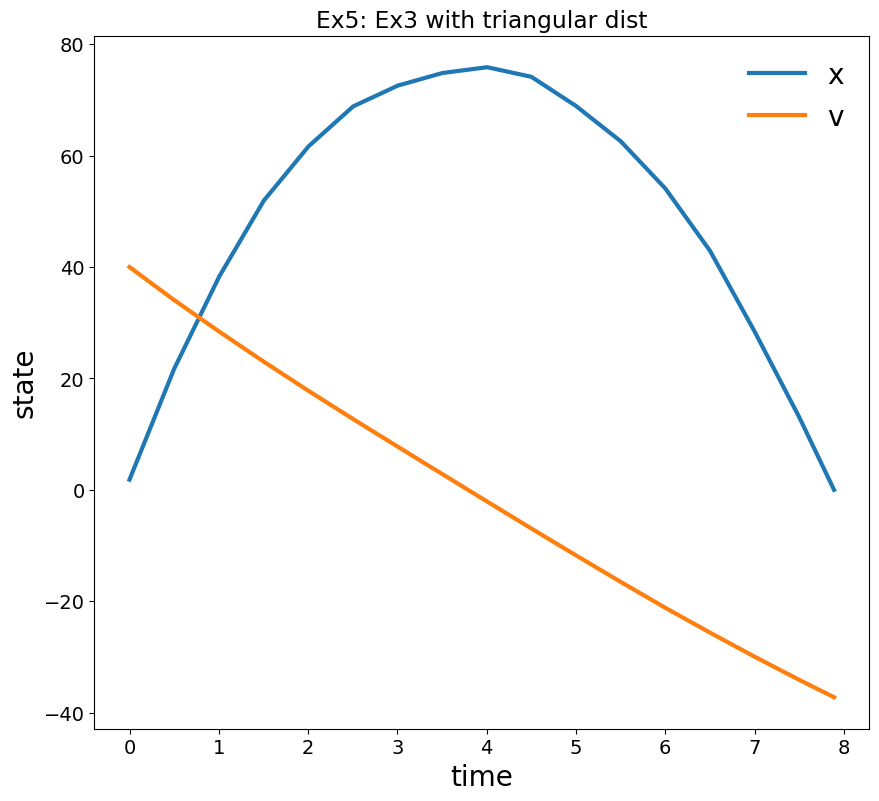

In [48]:
process_noise_dist = 'triangular'
model_config = {'process_noise_dist': process_noise_dist, 'process_noise': process_noise}
m = ThrownObject(**model_config)
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex5: Ex3 with triangular dist')

### Ex6: Measurement noise
#### Everything we've done with process noise, we can also do with measurement noise.
#### Just use 'measurement_noise' and 'measurement_noise_dist' 

states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 20.35092591060207, 'v': 34.07855124289541}
	1.00s: {'x': 36.12822744263126, 'v': 28.393737692901528}
	1.50s: {'x': 48.9812214219364, 'v': 22.99846684410669}
	2.00s: {'x': 59.18332628263409, 'v': 17.784029484245163}
	2.50s: {'x': 66.81357749367159, 'v': 12.705288070826589}
	3.00s: {'x': 71.92955924357045, 'v': 7.721366562656726}
	3.50s: {'x': 74.56918342157253, 'v': 2.794268972436784}
	4.00s: {'x': 74.75187498447991, 'v': -2.1113986020335997}
	4.50s: {'x': 72.51970359869338, 'v': -6.951038077083324}
	5.00s: {'x': 67.84376796132159, 'v': -11.78994457815374}
	5.50s: {'x': 60.767651534582804, 'v': -16.545494944171786}
	6.00s: {'x': 51.34088892233225, 'v': -21.18640641142484}
	6.50s: {'x': 39.62791879000095, 'v': -25.684491985662305}
	7.00s: {'x': 25.706379318441126, 'v': -30.015262094408577}
	7.50s: {'x': 9.665150243939953, 'v': -34.158332454780265}
	7.78s: {'x': -0.02584293949765626, 'v': -36.35101411864478}
outputs:
	0.00s: {'x': 2.996

Text(0.5, 1.0, 'Ex6: Measurement noise')

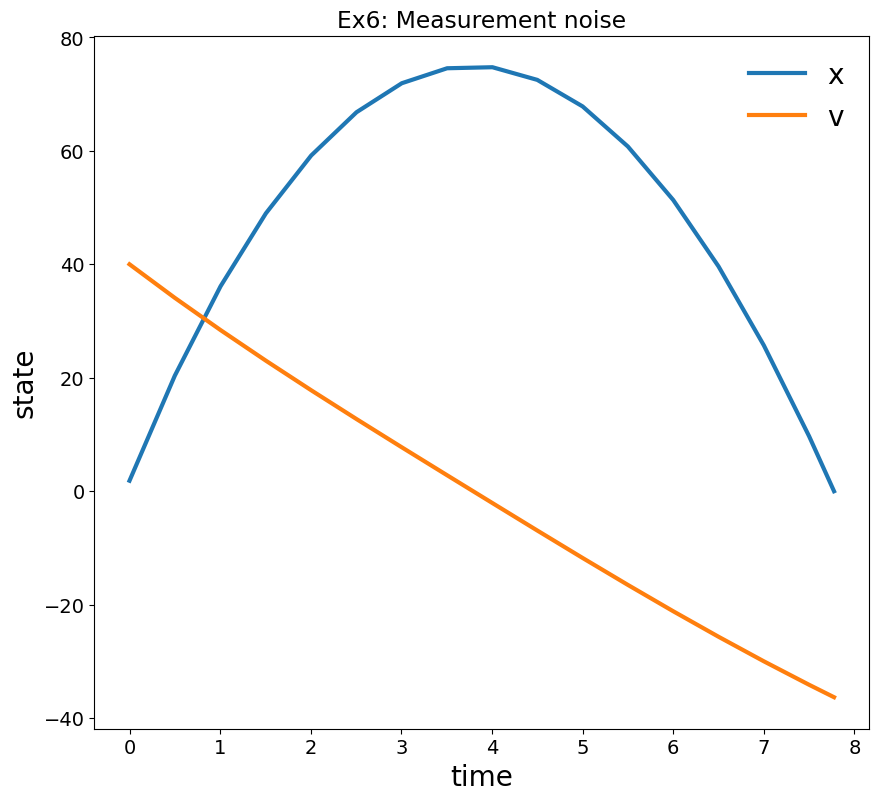

In [49]:
measurement_noise = {'x': 20}
measurement_noise_dist = 'uniform'
model_config = {'measurement_noise_dist': measurement_noise_dist, 'measurement_noise': measurement_noise}
m = ThrownObject(**model_config)
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex6: Measurement noise')

### Ex7: Proportional noise on velocity
#### OK, now for something a little more complicated. Let's try proportional noise on v only (more variation when it's going faster)
#### This can be used to do custom or more complex noise distributions


Example with proportional noise on velocity
states:
	0.00s: {'x': 1.83, 'v': 40.0}
	0.50s: {'x': 18.219146980802943, 'v': 26.108573696098322}
	1.00s: {'x': 28.65747626744562, 'v': 15.622722129504576}
	1.50s: {'x': 34.43048924652521, 'v': 7.741357308039583}
	2.00s: {'x': 36.73562461535334, 'v': 1.6781180658965122}
	2.50s: {'x': 36.36109128913896, 'v': -3.026043760339709}
	3.00s: {'x': 33.906398898723836, 'v': -6.672844310084536}
	3.50s: {'x': 29.843307749242015, 'v': -9.484857093610815}
	4.00s: {'x': 24.54257629159594, 'v': -11.644067509790752}
	4.50s: {'x': 18.359450644549458, 'v': -13.282249671421319}
	5.00s: {'x': 11.390937950524583, 'v': -14.547403898997567}
	5.50s: {'x': 3.867683731751455, 'v': -15.511517052100352}
	5.75s: {'x': -0.05931819728642461, 'v': -15.903409467314532}
outputs:
	0.00s: {'x': 1.83}
	0.50s: {'x': 18.219146980802943}
	1.00s: {'x': 28.65747626744562}
	1.50s: {'x': 34.43048924652521}
	2.00s: {'x': 36.73562461535334}
	2.50s: {'x': 36.36109128913896}
	3.00s: {'x':

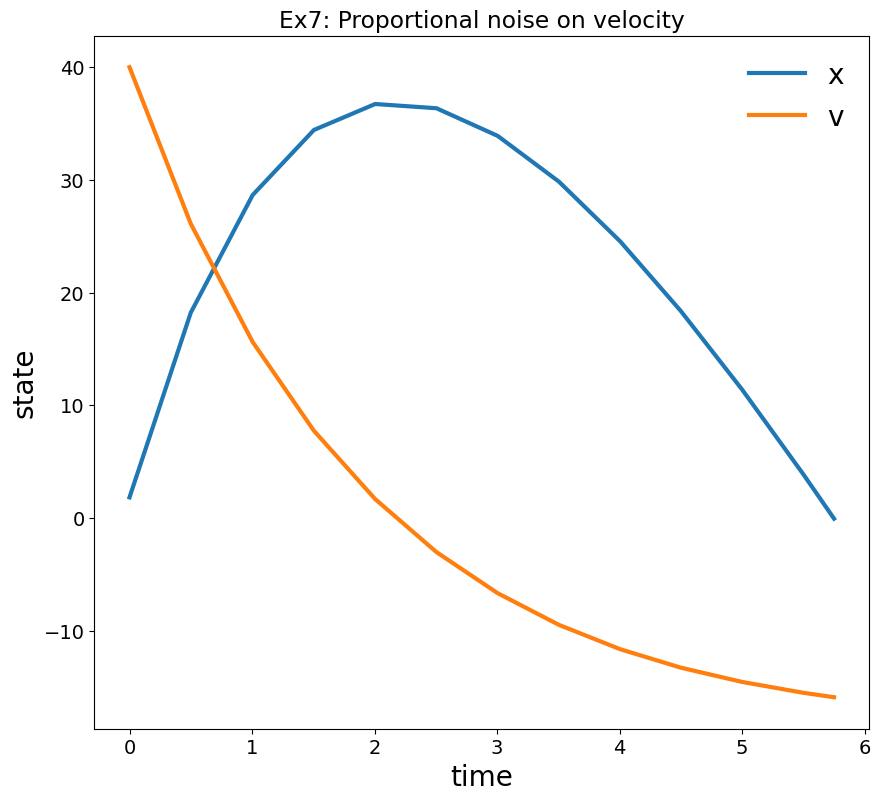

In [50]:
def apply_proportional_process_noise(self, x, dt = 1):
    x['v'] -= dt*0.5*x['v']
    return x
model_config = {'process_noise': apply_proportional_process_noise}
m = ThrownObject(**model_config)
print('\nExample with proportional noise on velocity')
simulated_results = m.simulate_to_threshold(future_load, **config)
print_results(simulated_results)
plt.title('Ex7: Proportional noise on velocity')

print('\nNote: If you would like noise to be applied in a repeatable manner, set the numpy random seed to a fixed value')
print('e.g., numpy.random.seed(42)')
plt.show()